# Energy conservation for flow in pipe 1‐D

## Workshop - Introduction to OpenFOAM for Chemical Engineering and relatd disciplines


<img src="../Documentacion/Figuras/Fig_1_Seccion_1.1_c.png" alt="Alternative text" 
     align="right"
     width="500"/> 

The one-dimensional partial differential equation that describes the problem of heat transfer of a fluid in a circular pipe and its heating by natural convection (Figure 1) is given by:

$$\rho \hat{C}_p \frac{\partial T}{\partial t} = k \frac{\partial^2 T}{\partial x^2} - \rho \hat{C}_p v_0 \frac{\partial T}{\partial x} - \frac{4 h(T-T_\text{aire})}{d_i} $$

with boundary conditions:

$$ CB1: T(x=0) = T_{in}$$

$$ CB2: \frac{d T}{d x}(x = L) = 0$$

and initial condition:

$$ CI: T(x, t=0) = T_{in}$$

The discretized version of this equation, we obtained by applying the [finite volume method](https://github.com/openfoam-ICL-UC/openfoam_intro_ES/wiki/Conservaci%C3%B3n-de-energ%C3%ADa-en-flujo-en-tuber%C3%ADa-1%E2%80%90D) and considering a central scheme for the spatial derivatives in the heat conduction term and an upwind scheme for the heat convection term, while using a forward Euler scheme for the temporal derivative.

### Import modules

In [1]:
# To improve quality of plots in Jupyter Notebook
#%matplotlib notebook

# Visualisation of data y plots
import matplotlib
import matplotlib.pyplot as plt 

# Numeric Computation
import numpy as np

# Function for numerical integration
from scipy.integrate import solve_ivp

### Initialise variables y parameters 

In [2]:
# Constant known parameters 

# Pipe length / m
L = 1

# Internal pipe diameter / m
di = 0.0254*2

# Fluid velocity / m s^-1
u0 = 0.1

# Air temperature / K
Taire = 273.15 + 25

# Inlet fluod temperature / K
Tin = 70

# Heat transfer coefficient for natural convection / W m^-2 K^-1 
h = 25

# Liquid nitrogen properties at 70 K and 1 atm
# Fluid density / kg m^-3
rho = 838.645

# Viscosity / Pa s
mu = 2.2e-4

# Themal conductivity / W m^-1 K^-1 
k = 0.16

# Heat capacity at constant pressure / J kg^-1 K^-1
Cp = 2014.03

# Thermal diffusivity / m^2 s^-1
alpha = k / (rho * Cp) 
print('alpha = %.3e' %alpha)

# Prandtl number Pr=(mu/rho)/alpha
Pr = (mu/rho)/alpha
print('Pr = %.3f' %Pr)

# Peclet
Pe = u0/(alpha/L)
print('Pe = %.3f' %Pe)

alpha = 9.473e-08
Pr = 2.769
Pe = 1055660.118


### Generate mesh 1-D and spatial spacing

In [3]:
# Mesh in x coordinate along the pipe

# Tuple to save initial and final x value
x_rango = (0, L)

# Number of points in the mesh
N = 100

# Spacial spacing
dx = L/N
dx_half = dx/2


# Vector in x coordinate
# the vector x_grilla stores the coordinates of central points (P) for each control volume
x_grilla = np.linspace(dx_half, L-dx_half, N)

print('dx = %.1e' %dx)
print(x_grilla)

dx = 1.0e-02
[0.005 0.015 0.025 0.035 0.045 0.055 0.065 0.075 0.085 0.095 0.105 0.115
 0.125 0.135 0.145 0.155 0.165 0.175 0.185 0.195 0.205 0.215 0.225 0.235
 0.245 0.255 0.265 0.275 0.285 0.295 0.305 0.315 0.325 0.335 0.345 0.355
 0.365 0.375 0.385 0.395 0.405 0.415 0.425 0.435 0.445 0.455 0.465 0.475
 0.485 0.495 0.505 0.515 0.525 0.535 0.545 0.555 0.565 0.575 0.585 0.595
 0.605 0.615 0.625 0.635 0.645 0.655 0.665 0.675 0.685 0.695 0.705 0.715
 0.725 0.735 0.745 0.755 0.765 0.775 0.785 0.795 0.805 0.815 0.825 0.835
 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915 0.925 0.935 0.945 0.955
 0.965 0.975 0.985 0.995]


In [4]:
# Cell Peclet number
# for central differencing Pe < 2
Pe = rho*u0/((rho*alpha)/dx)
print('Cell Peclet number = %.1f' %Pe)

Cell Peclet number = 10556.6


### Defining temporal spacing

In [5]:
# Courant–Friedrichs–Lewy number
CFL_max = 1.0
dt_CFL = CFL_max * 2 * dx / u0
print('dt (CFL) <= %.2e' %dt_CFL)

# rho*Cp*dx/dt > 2*k/dx
dt_cond = rho*Cp*dx**2/(2*k)
print('dt (cond) <= %.2e' %dt_cond)

# Temporal spacing
dt = min(dt_CFL,dt_cond)
dt = dt/5
print('dt %.2e' %dt)

# Initial time
t_inicial = 0.0

# Final time
t_final = 12 #dt*1e5
print('final time = %.1f' %t_final)

# Initial temperature condition
T = np.ones(N) * Tin
T

dt (CFL) <= 2.00e-01
dt (cond) <= 5.28e+02
dt 4.00e-02
final time = 12.0


array([70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70.])

### Define the coefficients for matrix A and vector b

The discretised equation by the method of finite volumnes can be eritten in matrix form:

$$ a_P \mathbf{T}^{n+1} = \mathbf{A}\mathbf{T}^{n} + \mathbf{b}$$

#### Discretisation for internal control volumes:

$$ \frac{\rho C_p \Delta x}{\Delta t} T_P^{n+1} = \left(\frac{k}{\Delta x}\right)T_E^n + \left(\rho C_p v_0 + \frac{k}{\Delta x}\right)T_W^n + \left(\frac{\rho C_p \Delta x}{\Delta t} -\rho C_p v_0 -2\frac{k}{\Delta x} - \frac{4 h \Delta x}{d_i}\right)T_P^n + \frac{4 h\Delta x}{d_i}T_\text{aire}$$

We can define the following coefficients:

$$ a_P T_P^{n+1} = a_E T_E^n + a_W T_W^n + a_P' T_P^n + S_u$$

$$ a_P = \frac{\rho C_p \Delta x}{\Delta t}$$

$$ a_E = \frac{k}{\Delta x}$$

$$ a_W = \rho C_p v_0 + \frac{k}{\Delta x}$$

$$ S_p = - \frac{4 h \Delta x}{d_i}$$

$$ a_P' = a_P - (a_E + a_W) + S_p$$

$$ S_u = \frac{4 h \Delta x}{d_i}T_\text{aire}$$

In [6]:
# Internal control volumes
aP = rho*Cp*dx/dt

aE = k/dx

aW = rho*Cp*u0 + k/dx

Sp = -4*h*dx/di

aP_n = aP - (aE + aW) + Sp

Su = 4*h*Taire*dx/di

print('aP = %.1f' %aP)
print('aE = %.1f' %aE)
print('aW = %.1f' %aW)
print('|sum a_nb|/|aP_n| = %.2e' %(abs(aE+aW)/abs(aP_n)))

aP = 422264.0
aE = 16.0
aW = 168921.6
|sum a_nb|/|aP_n| = 6.67e-01


#### Discretisation of boundary condition 1 (BC1) for first control volume:

$$T(x=0,t) = T_{in} \rightarrow T_{1-1/2}^n = T_{in}$$

Substituting in disretised equation:

$$ \rho C_p \frac{T_1^{n+1} - T_1^n}{\Delta t} = - \frac{\rho C_p v_0}{\Delta x}\left(T_1^n-T_{in}\right) + \frac{1}{\Delta x}\left(k\left(\frac{T_2^n-T_1^n}{\Delta x}\right) - k\left(\frac{T_1^n - T_{in}}{\Delta x/2}\right)\right) - \frac{4 h(T_1^n-T_\text{aire})}{d_i}$$

Reordering terms:

$$\frac{\rho C_p\Delta x}{\Delta t} T_1^{n+1} = \left(\frac{k}{\Delta x}\right)T_2^n + \left(\frac{\rho C_p\Delta x}{\Delta t} - \rho C_p v_0-\frac{3 k}{\Delta x} -\frac{4 h\Delta x}{d_i}\right)T_1^n + \left(\rho C_p v_0 + \frac{2 k}{\Delta x}\right)T_{in} + \frac{4 h \Delta x}{d_i}T_{aire}$$

$$ a_P = \frac{\rho C_p \Delta x}{\Delta t}$$

$$ a_E = \frac{k}{\Delta x}$$

$$ a_W = 0$$

$$ S_p = - \rho C_p v_0 -\frac{2 k}{\Delta x} - \frac{4 h \Delta x}{d_i}$$

$$ a_P' = a_P - (a_E + a_W) + S_p $$

$$ S_u = \left(\rho C_p v_0 + \frac{2 k}{\Delta x}\right)T_{in} + \frac{4 h \Delta x}{d_i}T_{aire}$$

In [7]:
# COntrol volume in boundary x=0 
aP_bc1 = aP

aE_bc1 = aE

aW_bc1 = 0

Sp_bc1 = Sp

aP_n_bc1 = aP_bc1 -rho*Cp*u0 - 3*k/dx + Sp_bc1

Su_bc1 = (rho*Cp*u0 + 2*k/dx)*Tin + Su

print('aP (BC1) = %.1f' %aP_bc1)
print('aE (BC1) = %.1f' %aE_bc1)
print('aW (BC1) = %.1f' %aW_bc1)
print('|sum a_nb|/|aP_n| (BC1) = %.2e' %(abs(aE_bc1+aW_bc1)/abs(aP_n_bc1)))

aP (BC1) = 422264.0
aE (BC1) = 16.0
aW (BC1) = 0.0
|sum a_nb|/|aP_n| (BC1) = 6.32e-05


#### Discretisation of boundary condition 2 (BC2) for last control volume:

$$\frac{d T}{d x}(x=L,t) = 0 \rightarrow \frac{T_{N+1/2} - T_{N}}{\Delta x/2} = 0 \rightarrow T_{N+1/2}^n = T_N^n$$

Substituting in the discretised equation:

$$ \rho C_p \frac{T_N^{n+1} - T_N^n}{\Delta t} = - \frac{\rho C_p v_0}{\Delta x}\left(T_N^n-T_{N-1}^n\right) + \frac{1}{\Delta x}\left(k\left(\frac{T_{N+1/2}^n-T_N^n}{\Delta x/2}\right) - k\left(\frac{T_N^n - T_{N-1}^n}{\Delta x}\right)\right) - \frac{4 h(T_N^n-T_\text{aire})}{d_i}$$

$$ \rho C_p \frac{T_N^{n+1} - T_N^n}{\Delta t} = - \frac{\rho C_p v_0}{\Delta x}\left(T_N^n-T_{N-1}^n\right) + \frac{1}{\Delta x}\left(0 - k\left(\frac{T_N^n - T_{N-1}^n}{\Delta x}\right)\right) - \frac{4 h(T_N^n-T_\text{aire})}{d_i}$$

Reordering terms:

$$\frac{\rho C_p\Delta x}{\Delta t} T_N^{n+1} = \left(\frac{\rho C_p\Delta x}{\Delta t} - \rho C_p v_0 -\frac{k}{\Delta x} -\frac{4 h\Delta x}{d_i}\right)T_N^n + \left(\rho C_p v_0 + \frac{k}{\Delta x}\right)T_{N-1}^n + \frac{4 h \Delta x}{d_i}T_{aire}$$

$$ a_P = \frac{\rho C_p \Delta x}{\Delta t}$$

$$ a_E = 0$$

$$ a_W = \rho C_p v_0 + \frac{k}{\Delta x}$$

$$ S_p = - \frac{4 h \Delta x}{d_i}$$

$$ a_P' = a_P - (a_E + a_W) + S_p $$

$$ S_u = \frac{4 h \Delta x}{d_i}T_{aire}$$

In [8]:
# Control volume at boundary x=L
aP_bc2 = aP

aE_bc2 = 0

aW_bc2 = aW

Sp_bc2 = Sp

aP_n_bc2 = aP_bc2 - rho*Cp*u0 - k/dx  + Sp_bc2

Su_bc2 = Su

print('aP (BC2) = %.1f' %aP_bc2)
print('aE (BC2) = %.1f' %aE_bc2)
print('aW (BC2) = %.1f' %aW_bc2)
print('|sum a_nb|/|aP_n| (BC2) = %.2e' %(abs(aE_bc2+aW_bc2)/abs(aP_n_bc2)))

aP (BC2) = 422264.0
aE (BC2) = 0.0
aW (BC2) = 168921.6
|sum a_nb|/|aP_n| (BC2) = 6.67e-01


In [9]:
# Vector b
b = np.ones(len(T))
b[0] = Su_bc1
for i in range(1,N-1):
    b[i] = Su
b[-1] = Su_bc2

# Matrix of coefficients
A = np.zeros([N, N])
A[0][0] = aP_n_bc1
A[0][1] = aE_bc1
for i in range(1,N-1):
    # Coefficient of control volume at the left, (i-1)
    A[i, i-1] = aW
    
    # Coefficien of control volume in center, i
    A[i, i] = aP_n
        
    # Coefficient of control volumeat the right, i + 1
    A[i, i+1] = aE

A[N-1][N-1] = aP_n_bc2
A[N-1][N-2] = aW_bc2


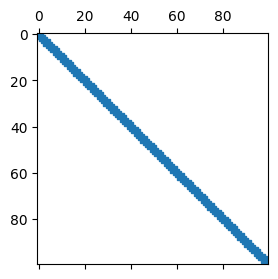

In [10]:
# Create a plot of N x N
fig, ax = plt.subplots(1, 1, figsize = [3,3])

# Plot spy
ax.spy(A, markersize = 3)
plt.show()

### Iteration

In [11]:
# List of profiles of temperature for each stored time
T_sol = []

# Copy initial vector of temperature
T_old = np.copy(T)

# Initialise time
t = 0

# List to store the times in which the solution is stored
times = []

# Initialise counter to store solution
n = 1

# Loop to progress in time 
while t < t_final:
    # Build a new vector for temperature
    T_new = (np.dot(A,T_old) + b)*(1/aP)

    # Progress in time with dt
    t += dt

    # Incrementa counter
    n += 1

    # Substitute old vector of temperature by new calculated profile
    T_old = np.copy(T_new)
    
    # Store solution
    if round(n%50) == 0:
        T_sol.append(T_new)
        print(t)
        times.append(t)

1.960000000000001
3.9600000000000026
5.960000000000004
7.960000000000006
9.959999999999964
11.959999999999921


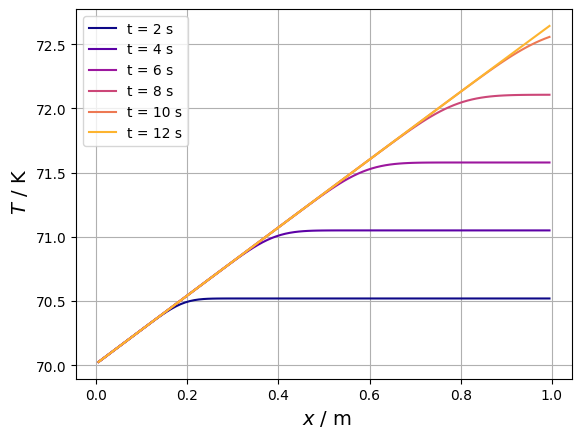

In [12]:
# Visualise temperature along the pipe
n_temp = len(T_sol)
plasma = matplotlib.colormaps['plasma']
colour = [plasma(i/n_temp) for i in range(n_temp)]

for j in range(len(T_sol)):
    plt.plot(x_grilla, T_sol[j], color = colour[j], label = "t = %.0f s" % times[j])


plt.xlabel(' $x$ / m', size = 14)
plt.ylabel(' $T$ / K', size = 14)
plt.grid()
plt.legend()
plt.show()

In [13]:
## Calculate the mean temperature in the pipe

# Cross-sectional erea of pope / m^2
A = np.pi*(di/2)**2

# Integrate the profile of temperature along the pipe to obtain the mean temperature with function trapz
Tmean = []
for j in range(len(T_sol)):
    temp = np.trapz(T_sol[j],x_grilla)/(x_grilla[-1]-x_grilla[0])
    Tmean.append(temp)
print('Mean temperature in pipe at fianl time = %.3f K' %Tmean[-1])


Mean temperature in pipe at fianl time = 71.337 K


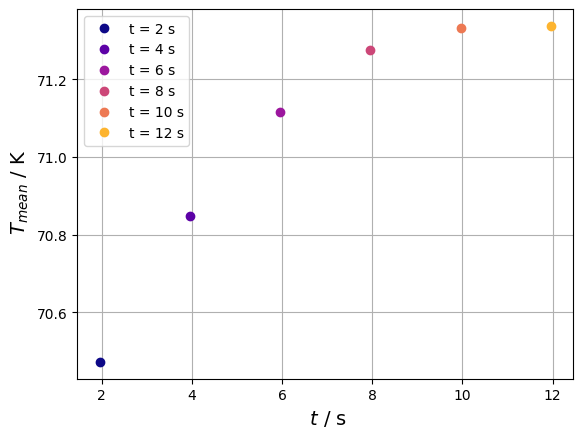

In [15]:
# Visualise mean temperature over time
for j in range(len(T_sol)):
    plt.plot(times[j], Tmean[j], 'o', color = colour[j], label = "t = %.0f s" % times[j])

plt.xlabel(' $t$ / s', size = 14)
plt.ylabel(' $T_{mean}$ / K', size = 14)
plt.grid()
plt.legend()
plt.show()

In [17]:
# Calculate the heat flux by natural convection transfered by the pipe wall in each point alongs the mesh
Atub_CV = 2*np.pi*(di/2)*dx

Q = []
for j in range(len(T_sol)):
    Qtemp = -h*(T_sol[j] - Taire)*Atub_CV #W
    Q.append(Qtemp)

# Calculate the total heat flux 
Qtot = np.sum(Q[-1])
print('Total heat flux at fianl time = %.3f W\n' %Qtot)

Total heat flux at fianl time = 904.942 W



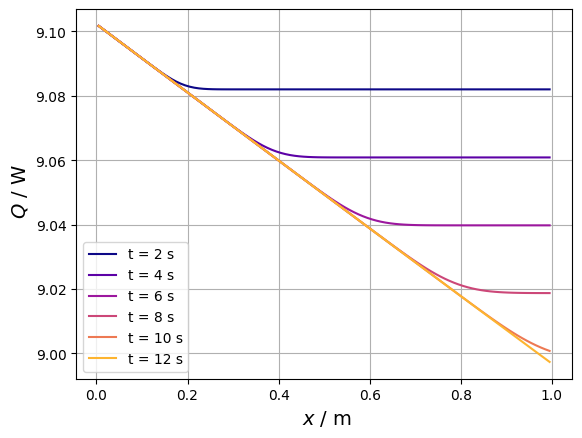

In [18]:
# Visualise the heat flux along the pipe
for j in range(len(T_sol)):
    plt.plot(x_grilla, Q[j], color = colour[j], label = "t = %.0f s" % times[j])

plt.xlabel(' $x$ / m', size = 14)
plt.ylabel(' $Q$ / W', size = 14)
plt.grid()
plt.legend()
plt.show()